In [3]:
%matplotlib inline
import geopandas as gpd

In [4]:
taxishp = 'C:/Users/Adrien/Desktop/bertille/Python projet/Python/shapefile/NYC/taxi_zones.shp'
taxizones = gpd.read_file(taxishp).to_crs({'init' :'epsg:4326'})
subshp = 'C:/Users/Adrien/Desktop/bertille/Python projet/Python/shapefile/NYC/subway_entrances.shp'
# to_crs ne semble rien changer
subway=gpd.read_file(subshp).to_crs({'init' :'epsg:4326'})

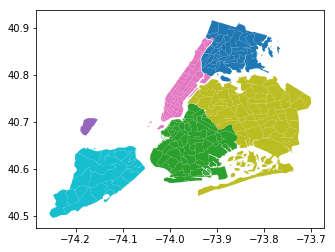

In [5]:
taxizones.plot(column='borough', categorical=True)

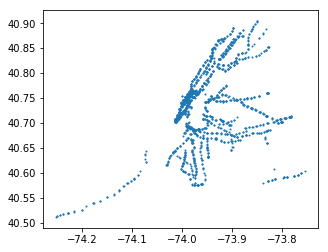

In [6]:
subway.plot(markersize=1)

<class 'geopandas.geodataframe.GeoDataFrame'>


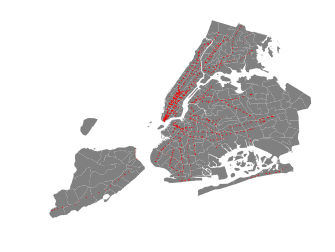

In [7]:
ax = taxizones.plot(color="grey")
ax.set_axis_off()
subway.plot(ax=ax, markersize=0.01, color='red')
print(type(subway))

In [13]:
type(subway['geometry'])

geopandas.geoseries.GeoSeries

In [14]:
type(taxizones)

geopandas.geodataframe.GeoDataFrame

In [12]:
zones_nbsubway = gpd.sjoin(subway[['geometry']], taxizones[['zone', 'LocationID', 'geometry']].copy(), op='within')
print(zones_nbsubway.head())

                                         geometry  index_right  \
0    POINT (-73.86835600032798 40.84916900104506)          241   
1    POINT (-73.86821300022677 40.84912800131844)          241   
770  POINT (-73.84287500052528 40.84012800134937)          241   
2    POINT (-73.87349900050798 40.84122300105249)           77   
3    POINT (-73.87289199978331 40.84145300067448)           77   

                     zone  LocationID  
0    Van Nest/Morris Park         242  
1    Van Nest/Morris Park         242  
770  Van Nest/Morris Park         242  
2            East Tremont          78  
3            East Tremont          78  


In [13]:
counts = zones_nbsubway.groupby('zone').size()
taxizones_nbstations = taxizones.merge(counts.reset_index(name='number_subway_stations'))
print(taxizones.head())
print("_________________________________________")
print("")
print(taxizones_nbstations.head())

taxizones_nbstations=taxizones.join(counts)

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((-74.18445299999996 40.6949959999999,...  
1         Queens  (POLYGON ((-73.82337597260663 40.6389870471767...  
2          Bronx  POLYGON ((-73.84792614099985 40.87134223399991...  
3      Manhattan  POLYGON ((-73.97177410965318 40.72582128133705...  
4  Staten Island  POLYGON ((-74.17421738099989 40.56256808599989...  
_________________________________________

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0   

Text(0.5,1,'Number of subway stations')

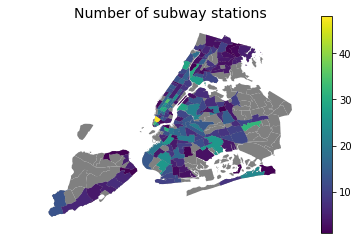

In [14]:
ax = taxizones.plot(color='grey')
ax.set_axis_off()
taxizones_nbstations.plot(ax=ax, column='number_subway_stations', figsize=(15, 6), legend=True).set_title('Number of subway stations', fontsize=14)

Text(0.5,1,'Number of subway stations')

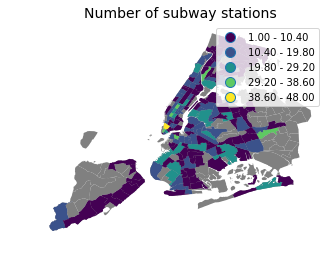

In [15]:
import pysal
ax = taxizones.plot(color='grey')
ax.set_axis_off()
taxizones_nbstations.plot(ax=ax, column='number_subway_stations', 
                          scheme='equal_interval', k=5, figsize=(15, 6), 
                          legend=True).set_title('Number of subway stations', fontsize=14)
